<a href="https://colab.research.google.com/github/Arju-cmd/Deep-Learning/blob/main/Neural_Network_Tuning_batch_size_Epochs_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

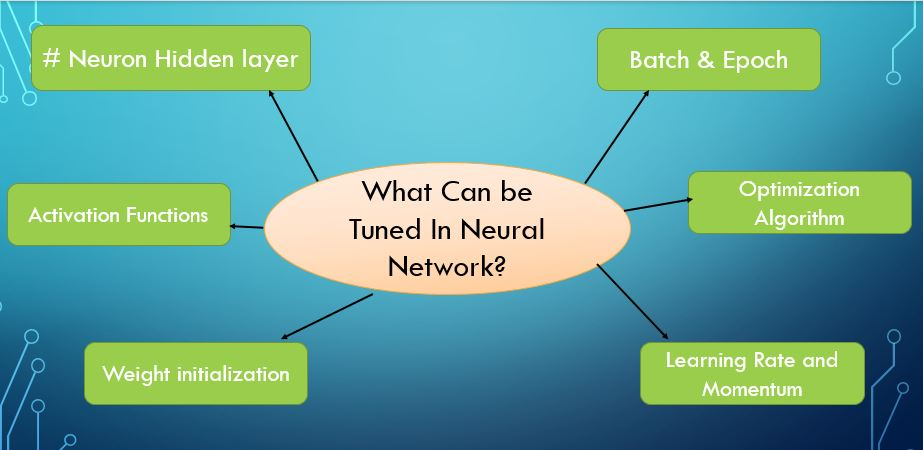

In [1]:
from IPython.display import Image
Image(filename='/content/1.png')

In [2]:
# Importing necesary packages
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
### part 1 - Tuning batch and epoch

In [4]:
# load the dataset for India diabetes
data = pd.read_csv('/content/diabetes.csv')

In [5]:
#viewing data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# split into predictors and response
X = data.iloc[:,0:8] #predictors
Y = data.iloc[:,8] #response

In [7]:
# Function to create model,for KerasClassifier
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mymodel

In [8]:
# create model
model = KerasClassifier(build_fn=create_my_model)

In [9]:
# define the grid search parameters
batchSize = [10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50]

In [10]:
parameter_grid = dict(batch_size=batchSize, epochs=epochs)

mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(X, Y)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 4.8101 - accuracy: 0.5951
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 3.1375 - accuracy: 0.6146
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 2.4186 - accuracy: 0.6367
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 1.9628 - accuracy: 0.6367
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 1.7497 - accuracy: 0.6523
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 1.6181 - accuracy: 0.6458
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 1.5594 - accuracy: 0.6315
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 1.3401 - accuracy: 0.6484
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 1.2136 - accuracy: 0.6602
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 1.0928 - accuracy: 0.6484
Epoch 11/50
77/77 [

In [11]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.680990 using {'batch_size': 10, 'epochs': 50}


In [12]:
# part 2- Optimizing Activation Function

In [13]:
# Function to create model
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=8, activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mymodel

In [14]:
# create model
model = KerasClassifier(build_fn=create_my_model, epochs=50, batch_size=10)

In [15]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [17]:
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 21.6462 - accuracy: 0.4414
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 4.8255 - accuracy: 0.6003
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 2.2835 - accuracy: 0.6133
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 1.5002 - accuracy: 0.5938
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 1.1672 - accuracy: 0.5859
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 0.9745 - accuracy: 0.5990
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 0.8696 - accuracy: 0.6250
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7840 - accuracy: 0.6589
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7350 - accuracy: 0.6549
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.6745
Epoch 11/50
77/77 

In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.684896 using {'optimizer': 'Adam'}
